dummy 변수 취하기
pd.get_dummies()2
korea를 더미변수로 쓸 경우, korea를 빼고 만들면 됨
-> 

In [1]:
# 기본 모듈 호출
import pandas as pd
import numpy as np

In [65]:
# 데이터 불러오기
df = pd.read_excel('dataset_hw1.xlsx')

rating이 non-linear할 경우, 제곱으로 가질 경우 유의미한 변수가 나올 수 있을까?


In [66]:
# data 수 확인
df.shape

(1411, 13)

In [67]:
# 데이터 확인 
df.head()

,movie_ID,title,genre,running_time,netizen_ratings,num_reviews,num_article,country,rating,companyNm,released_year,released_month,num_viewers
0,19820019,만추,멜로/로맨스,113.0,7.31,5175,8692,한국,15세이상관람가,씨제이엔터테인먼트,2011,2,844103
1,20050082,이터널 선샤인,멜로/로맨스,107.0,9.11,9388,812,미국,15세이상관람가,코리아픽쳐스(주),2005,11,506609
2,20061214,작은 연못,드라마,86.0,6.51,873,393,한국,15세이상관람가,NaN,2010,4,47160
3,20061223,소년은 울지 않는다,액션,98.0,5.62,266,352,한국,15세이상관람가,㈜스튜디오이쩜영,2008,11,94993
4,20068576,그날의 분위기,멜로/로맨스,103.0,6.53,3005,2953,한국,15세이상관람가,(주)쇼박스,2016,1,652453


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411 entries, 0 to 1410
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_ID         1411 non-null   int64  
 1   title            1411 non-null   object 
 2   genre            1408 non-null   object 
 3   running_time     1409 non-null   float64
 4   netizen_ratings  1411 non-null   float64
 5   num_reviews      1411 non-null   int64  
 6   num_article      1411 non-null   int64  
 7   country          1409 non-null   object 
 8   rating           1410 non-null   object 
 9   companyNm        1406 non-null   object 
 10  released_year    1411 non-null   int64  
 11  released_month   1411 non-null   int64  
 12  num_viewers      1411 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 143.4+ KB


In [69]:
df.describe()

,movie_ID,running_time,netizen_ratings,num_reviews,num_article,released_year,released_month,num_viewers
count,1.411000e+03,1409.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1.411000e+03
mean,2.012593e+07,110.545067,7.618731,4582.657690,1031.433026,2012.635719,6.406804,1.074520e+06
std,3.060055e+04,18.083797,1.111924,7316.325767,1866.725542,2.899102,3.465790,1.841526e+06
min,1.982002e+07,0.000000,2.530000,49.000000,0.000000,2005.000000,1.000000,2.260000e+04
25%,2.010038e+07,98.000000,7.010000,943.500000,38.000000,2010.000000,3.000000,1.079420e+05
50%,2.012641e+07,110.000000,7.800000,2175.000000,194.000000,2013.000000,7.000000,3.558510e+05
75%,2.015077e+07,121.000000,8.420000,5048.000000,1279.500000,2015.000000,9.000000,1.179833e+06
max,2.018766e+07,235.000000,9.380000,95111.000000,19996.000000,2018.000000,12.000000,1.761368e+07


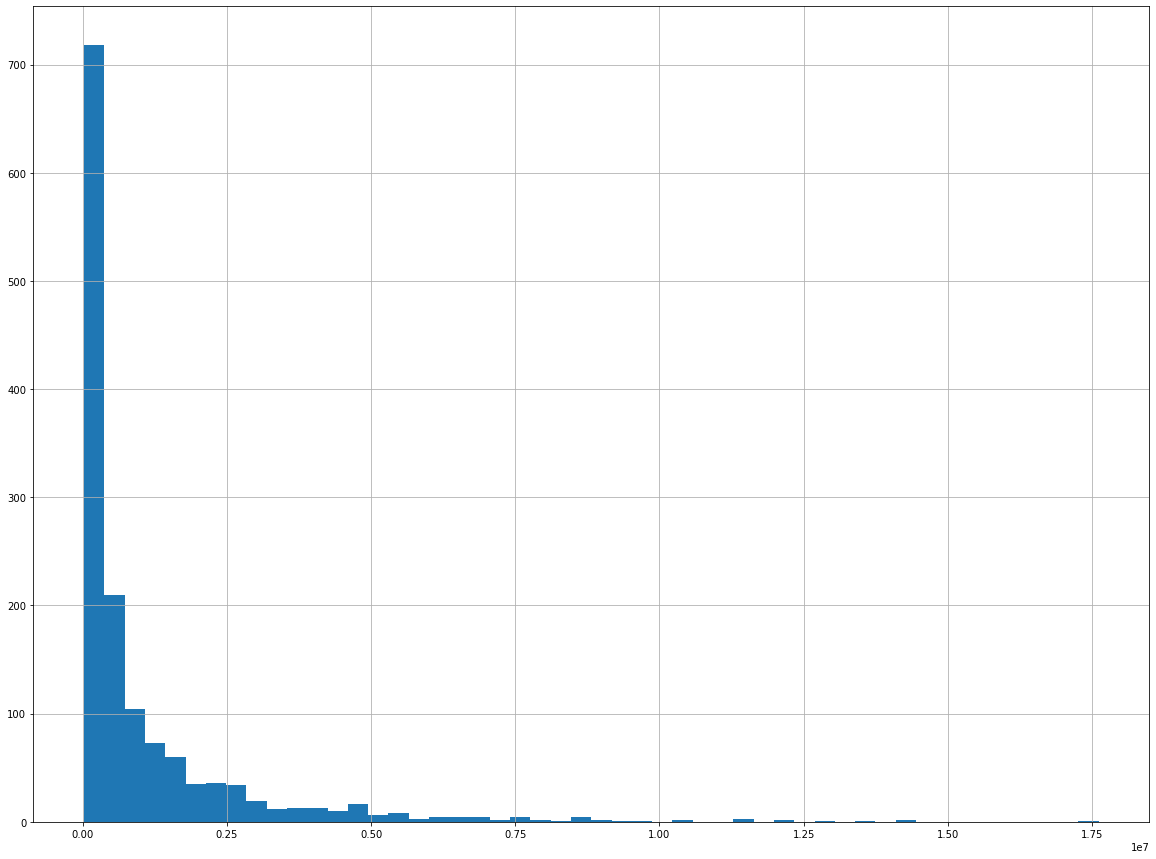

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
df['num_viewers'].hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
# data null 값 확인, 몇가지 null값 확인
df.isnull().sum()

movie_ID           0
title              0
genre              3
running_time       2
netizen_ratings    0
num_reviews        0
num_article        0
country            2
rating             1
companyNm          5
released_year      0
released_month     0
num_viewers        0
dtype: int64

In [84]:
corr_matrix = df.corr()

In [85]:
corr_matrix["num_viewers"].sort_values(ascending=False)

num_viewers        1.000000
num_reviews        0.842496
num_article        0.601169
running_time       0.312445
netizen_ratings    0.211225
released_year      0.066480
released_month     0.043424
movie_ID           0.030621
Name: num_viewers, dtype: float64

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(data[attributes], figsize=(12, 8))

In [ ]:
data.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
plt.show()

In [ ]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"]=data["population"]/data["households"]

In [6]:
df.notnull().sum()

movie_ID           1411
title              1411
genre              1408
running_time       1409
netizen_ratings    1411
num_reviews        1411
num_article        1411
country            1409
rating             1410
companyNm          1406
released_year      1411
released_month     1411
num_viewers        1411
dtype: int64

In [7]:
# null 값 삭제
df = df.dropna()

In [8]:
# 모든 컬럼 목록
['movie_ID', 'title', 'genre', 'running_time', 'netizen_ratings',
       'num_reviews', 'num_article', 'country', 'rating', 'companyNm',
       'released_year', 'released_month', 'num_viewers']

['movie_ID',
 'title',
 'genre',
 'running_time',
 'netizen_ratings',
 'num_reviews',
 'num_article',
 'country',
 'rating',
 'companyNm',
 'released_year',
 'released_month',
 'num_viewers']

In [9]:
# 제거한 컬럼 목록
'title','genre','country','rating','companyNm',

('title', 'genre', 'country', 'rating', 'companyNm')

In [52]:
# 정수형 data만 남긴 dataframe
df1 = df[['movie_ID', 'running_time', 'netizen_ratings','num_reviews', 'num_article','released_year', 'released_month', 'num_viewers']]

In [56]:
# 각 컬럼(독립변수별)정확도 측정
df1 = df[['num_reviews', 'num_viewers']]
# 'running_time', 'netizen_ratings','num_reviews', 'num_article','released_year', 'released_month', 

In [57]:
# null 값 삭제 후 dataframe확인
df.notnull().sum()

movie_ID           1400
title              1400
genre              1400
running_time       1400
netizen_ratings    1400
num_reviews        1400
num_article        1400
country            1400
rating             1400
companyNm          1400
released_year      1400
released_month     1400
num_viewers        1400
dtype: int64

In [58]:
df1 = df1.values

In [59]:
import matplotlib.pyplot as plt

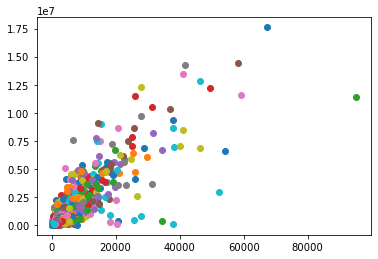

In [60]:
for v in df1:
    plt.scatter(v[0],v[-1])
plt.show()

In [14]:
df1.shape

(1400, 2)

In [15]:
# 종속변수와 독립변수 데이터 분리하기
y = df1[:,-1]
X = df1[:,:-1]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(f'X.train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')

X.train shape : (980, 1)
X_test shape : (420, 1)


# feature scaling 해야행!!
standard / min-max 둘 다 써본다


In [43]:
# standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train_std = scaler.fit_transform(X_train) # 학습데이터 존재하는 평균과 표준편차를 얻어냄
X_test_std = scaler.transform(X_test) # fit 을 뺀 transform만 사용.
##??? 왜 이렇게 하는거징... 학습데이터에서 도출된 모형의 성능평가를 위해 
## 따로 따로 표준화를 할 경ㅇ에는 어떠한 문제가 생기는가?? 
## 데이터를 나눠준 다음에 학습데이터 대해 얻어진 정보로 feature scaling 진행, 
# 한번에 feature scaling을 하게 되면 효과가 훨씬 좋은 것 처럼 나온다(overfitting 이 나온다는 건가??)

In [ ]:
# min-max scaler 
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()

# fit 다음에 coefficient, intercept 확인

In [40]:
from sklearn.metrics import r2_score #r2 score 호출
from sklearn.metrics import mean_squared_error # 비용함수 계산

# Linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print(f'Linear Regression : {model.score(X_test, y_test) * 100 :0.3f}%')
print(f'R2 score : {r2_score(y_test, model.predict(X_test))}')
print(f'MSE : {mean_squared_error(y_test, model.predict(X_test))}')
print('=' * 40)

Linear Regression : 52.735%
R2 score : 0.5273453981787933
MSE : 1138435811680.047


In [38]:
# lasso
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.5)
model_lasso.fit(X_train, y_train)
print(f'Lasso : {model_lasso.score(X_test, y_test) * 100 :0.3f} %')
print(f'R2 score : {r2_score(y_test, model.predict(X_test))}')
print(f'MSE : {mean_squared_error(y_test, model.predict(X_test))}')
print('=' * 40)

Lasso : 52.735 %
MSE : 1138435811680.047


In [39]:
# ridge
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(X_train, y_train)
print(f'Ridge : {model_ridge.score(X_test, y_test) * 100:0.3f} %')
print(f'R2 score : {r2_score(y_test, model.predict(X_test))}')
print(f'MSE : {mean_squared_error(y_test, model.predict(X_test))}')
print('=' * 40)

Ridge : 52.735 %
MSE : 1138435811680.047


In [18]:
import xgboost as xgb
from xgboost import  plot_importance

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

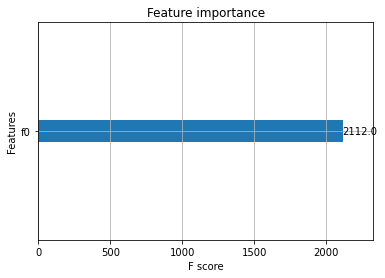

In [19]:
plot_importance(model)

In [20]:
y_pred = model.predict(X_test)
predictions =[round(value) for value in y_pred]

In [21]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

2283720728187.3677

In [22]:
from sklearn.metrics import accuracy_score

# accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 0.00%


# elastic net 해봐라!
